<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/1_Basics/26_Pandas_Analysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Pandas Analysis

Load in the data.

In [ ]:
# Install datasets Library (if not already installed)
# !pip install -U datasets

# Importing Libraries
import pandas as pd
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

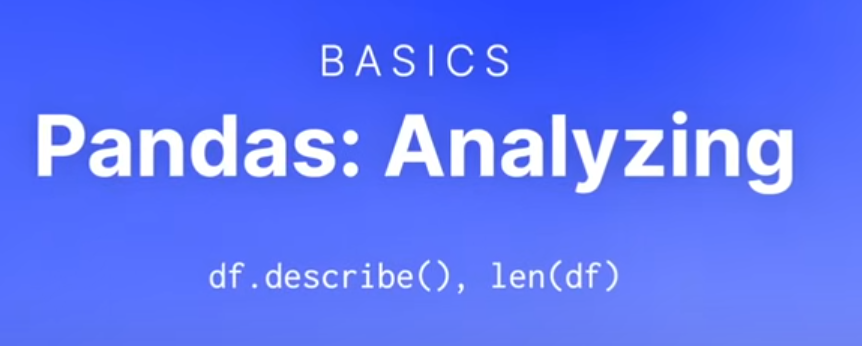

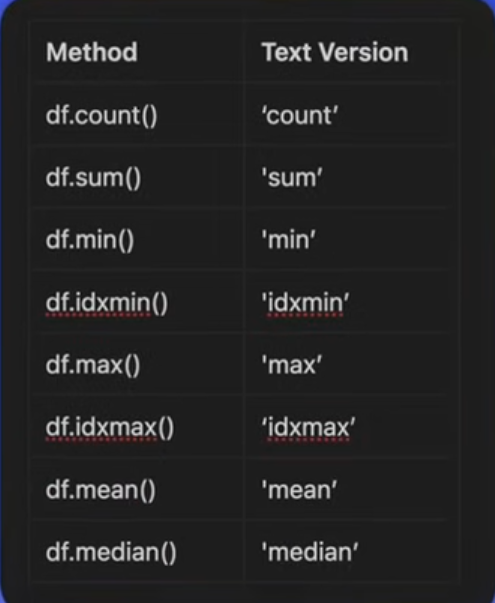
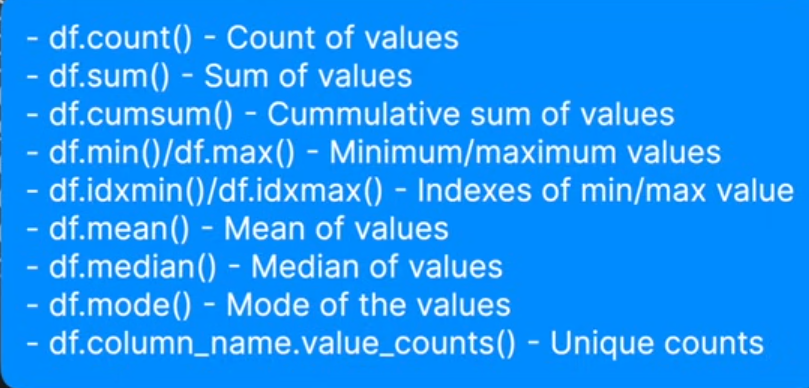

## Descriptive Statistics

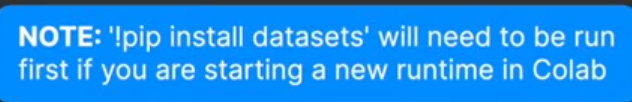

### Describe()

#### Notes

For a basic overview we'll be using `describe()`.
* It gets the following (for columns with numeric data):
  * count
  * mean
  * std
  * min
  * max
* Great for getting a quick overview of the basic stats for the table.
* It automatically skips NaN values.

#### Example

Use `describe()` on our DataFrame.

In [ ]:
df.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,787686,22026.000000,10649.000000
mean,2023-06-25 00:10:18.590701056,123252.899602,47.009578
min,2022-12-31 06:01:15,15000.000000,8.000000
25%,2023-03-19 06:24:00.249999872,90000.000000,27.500000
50%,2023-06-28 13:03:44.500000,115000.000000,45.965000
75%,2023-09-26 14:26:56,150000.000000,61.159996
max,2023-12-31 06:12:38,960000.000000,391.000000
std,NaN,48322.437693,21.871277


You can also use it on individual columns. If we just wanted to look at `salary_year_avg` then we'd do:

In [ ]:
df['salary_year_avg'].describe()

count     22026.000000
mean     123252.899602
std       48322.437693
min       15000.000000
25%       90000.000000
50%      115000.000000
75%      150000.000000
max      960000.000000
Name: salary_year_avg, dtype: float64

### Common Data Analysis Methods

#### Notes

But there are other methods like:
* `df.sum()` - Sum of values
* `df.cumsum()` - Cummulative sum of values
* `df.min()`/`df.max()` - Minimum/maximum values
* `df.idxmin()`/`df.idxmax()` - Indexes of minimum/Maximum value
* `df.mean()` - Mean of values
* `df.median()` - Median of values
* `df.mode()` - Mode of the values
* `series.value_counts()` - Counts of unique values for a Series (aka a column)
    * Typically used for counting *unique occurrences* within a single column.
    * It's not applicable to an entire DataFrame without specifying a column.
* Depending on the method, you can apply it directly to a DataFrame or a Series.

#### Examples

Let's get the count of the values in each column within the entire DataFrame.

In [ ]:
df.count()

job_title_short          787686
job_title                787685
job_location             786646
job_via                  787679
job_schedule_type        774976
job_work_from_home       787686
search_location          787686
job_posted_date          787686
job_no_degree_mention    787686
job_health_insurance     787686
job_country              787633
salary_rate               33073
salary_year_avg           22026
salary_hour_avg           10649
company_name             787668
job_skills               670364
job_type_skills          670364
dtype: int64

This is good to get a general overview of the DataFrame but it isn't that useful to us right now. Let's do some counts on specific columns:

Get the mode of the `'salary_year_avg'` column.

In [ ]:
df['salary_year_avg'].mode()

0    90000.0
Name: salary_year_avg, dtype: float64

Now we are going to get the index value of the max value of `salary_year_avg`.

In [ ]:
df['salary_year_avg'].idxmax()

752615

It gave us the index (row) = 357614. Remember how to get a row by the index number? We'll use `iloc` and inspect this.

It looks correct based on the maximum value we saw when using `describe()`.

In [ ]:
df.iloc[357614]

job_title_short                                     Data Analyst
job_title                                           Data Analyst
job_location             San José Province, San José, Costa Rica
job_via                                     via BeBee Costa Rica
job_schedule_type                                      Full-time
job_work_from_home                                         False
search_location                                       Costa Rica
job_posted_date                              2023-06-18 08:22:33
job_no_degree_mention                                      False
job_health_insurance                                       False
job_country                                           Costa Rica
salary_rate                                                 None
salary_year_avg                                              NaN
salary_hour_avg                                              NaN
company_name                                           TD SYNNEX
job_skills               

How about the *unique* count of job titles?

In [ ]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196593
Data Engineer                186678
Data Scientist               172727
Business Analyst              49160
Software Engineer             45019
Senior Data Engineer          44692
Senior Data Scientist         37076
Senior Data Analyst           29289
Machine Learning Engineer     14106
Cloud Engineer                12346
Name: count, dtype: int64

## Aggregation

### Groupby()

#### Notes

* Use `groupby` to group your DataFrame by the unique values in a specific column.
* Lets you perform aggregation (e.g. mean, sum) on the grouped data.
* Aggregations you can perform:
  * `mean()`: Computes the mean of the groups
  * `sum()`: Calculates the sum of the group values
  * `median()`: Finds the median of each group
  * `min()` and `max()`: Determine the minimum and maximum values within each group
  * Counts:
    * `count()`: Counts the number of non-NA/null entries in each group
    * `size()`: Returns the size of each group (including NA/null values)
  * `std()` and `var()`: Calculate the standard deviation and variance of groups
  * `first()` and `last()`: Get the first and last row of each group
  * `unique()`: Counts the number of unique non-NA/null values in each group

#### Examples

If we want to find the average yearly salary by `job_title_short`.

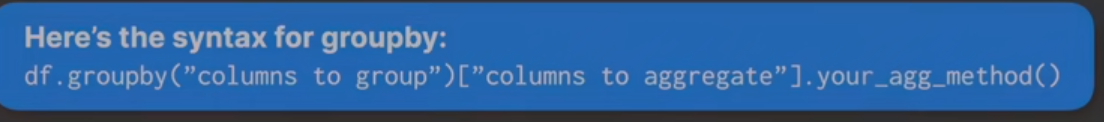
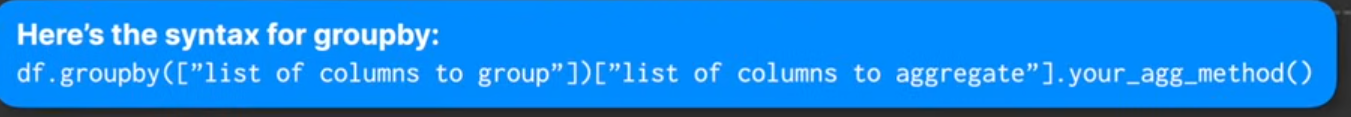
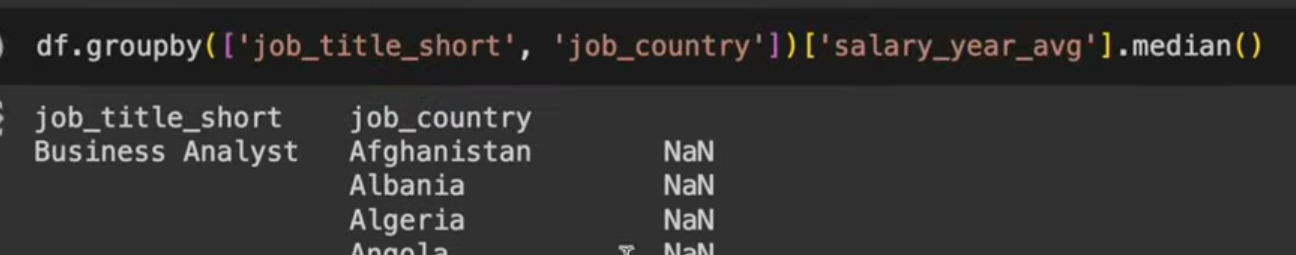
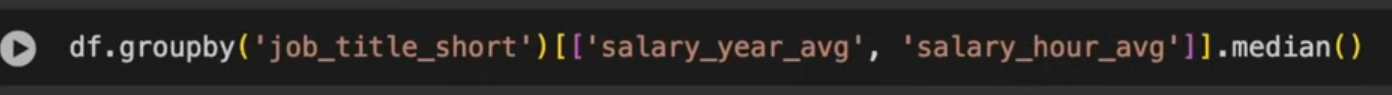

In [ ]:
df.groupby('job_title_short')['salary_year_avg'].mean()

job_title_short
Business Analyst              91191.520893
Cloud Engineer               111268.453846
Data Analyst                  93842.560714
Data Engineer                130182.584222
Data Scientist               136032.019578
Machine Learning Engineer    126728.314136
Senior Data Analyst          113850.304880
Senior Data Engineer         145932.118777
Senior Data Scientist        154112.680323
Software Engineer            112884.612303
Name: salary_year_avg, dtype: float64

What about the median of the salary by job title short?

In [ ]:
df.groupby('job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               128000.0
Machine Learning Engineer    106000.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155000.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

### Agg()

#### Notes

* `agg()` lets you apply multiple functions at once.
* You can pass a list of functions to `agg()` to apply them all to the grouped data, or a dictionary to apply specific functions to specific columns.


#### Example

For each job title (`job_title_short`) let's get the minimum and maximum values for the salary.

In [ ]:
df.groupby('job_title_short')['salary_year_avg'].agg(['min', 'max'])    #in agg(),you provide a list of arguements

,min,max
job_title_short,,
Business Analyst,16500.0,387460.0
Cloud Engineer,42000.0,280000.0
Data Analyst,25000.0,650000.0
Data Engineer,15000.0,525000.0
Data Scientist,27000.0,960000.0
Machine Learning Engineer,30000.0,325000.0
Senior Data Analyst,30000.0,425000.0
Senior Data Engineer,35000.0,425000.0
Senior Data Scientist,45000.0,890000.0
